# Telecom Churn Case Study:
Define high value customers based on certain metrics and predict churn for such customers

## Import python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# visualization
from matplotlib.pyplot import xticks
%matplotlib inline

pd.set_option('display.max_columns',None)

## Import Dataset

In [2]:
churn_data=pd.read_csv("C:/DataScienceUpgrad/Main Course/Course 4-Machine Learning II/Module 8-Telecom Churn Case Study/telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# make o copy of imported data frame
churn_data_copy=churn_data.copy()
churn_data_copy.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

## Inspecting the Dataframe

In [4]:
churn_data_copy.shape

(99999, 226)

In [5]:
churn_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
churn_data_copy.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Cleaning

#### Renaming columns to match rest of the column format


In [7]:
churn_data_copy.rename(columns={'aug_vbc_3g': 'vbc_3g_8', 'jul_vbc_3g': 'vbc_3g_7', 'jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'}, inplace=True)
churn_data_copy.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'],
      dtype='object', length=226)

#### Missing values treatment

In [8]:
# Let's check % of missing values in each column of churn_data dataframe.
((churn_data_copy.isna().mean()*100).round(2)).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [9]:
# there are many columns with more than 70 % of missing values. Let's see only those columns and if they are not necessary for any further calculations lets drop them
cols_to_drop=churn_data_copy.columns[((churn_data_copy.isna().mean()*100).round(2))>70].sort_values(ascending=False)
cols_to_drop

Index(['total_rech_data_9', 'total_rech_data_8', 'total_rech_data_7',
       'total_rech_data_6', 'night_pck_user_9', 'night_pck_user_8',
       'night_pck_user_7', 'night_pck_user_6', 'max_rech_data_9',
       'max_rech_data_8', 'max_rech_data_7', 'max_rech_data_6', 'fb_user_9',
       'fb_user_8', 'fb_user_7', 'fb_user_6', 'date_of_last_rech_data_9',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_6', 'count_rech_3g_9', 'count_rech_3g_8',
       'count_rech_3g_7', 'count_rech_3g_6', 'count_rech_2g_9',
       'count_rech_2g_8', 'count_rech_2g_7', 'count_rech_2g_6',
       'av_rech_amt_data_9', 'av_rech_amt_data_8', 'av_rech_amt_data_7',
       'av_rech_amt_data_6', 'arpu_3g_9', 'arpu_3g_8', 'arpu_3g_7',
       'arpu_3g_6', 'arpu_2g_9', 'arpu_2g_8', 'arpu_2g_7', 'arpu_2g_6'],
      dtype='object')

In [10]:
# all the above columns can be dropped as not required further.
churn_data_copy=churn_data_copy.drop(cols_to_drop, axis=1)
# again check the % of missing values
((churn_data_copy.isna().mean()*100).round(2)).sort_values(ascending=False)

loc_ic_t2m_mou_9      7.75
std_og_t2t_mou_9      7.75
std_ic_t2f_mou_9      7.75
std_ic_t2t_mou_9      7.75
roam_og_mou_9         7.75
loc_ic_mou_9          7.75
loc_og_t2t_mou_9      7.75
loc_ic_t2f_mou_9      7.75
roam_ic_mou_9         7.75
ic_others_9           7.75
loc_og_mou_9          7.75
std_ic_t2o_mou_9      7.75
offnet_mou_9          7.75
loc_ic_t2t_mou_9      7.75
std_ic_mou_9          7.75
onnet_mou_9           7.75
og_others_9           7.75
std_og_mou_9          7.75
isd_ic_mou_9          7.75
std_og_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
loc_og_t2f_mou_9      7.75
std_og_t2c_mou_9      7.75
spl_ic_mou_9          7.75
isd_og_mou_9          7.75
loc_og_t2c_mou_9      7.75
spl_og_mou_9          7.75
loc_og_t2m_mou_9      7.75
std_ic_t2m_mou_9      7.75
spl_ic_mou_8          5.38
                      ... 
vbc_3g_8              0.00
vbc_3g_7              0.00
vol_2g_mb_9           0.00
vol_2g_mb_7           0.00
total_og_mou_7        0.00
vol_2g_mb_6           0.00
t

In [11]:
# Still many columns have missing values most of them are for 9th month.
# Lets drop the columns with name lasting as  _9 
# except columns total_ic_mou_9, total_og_mou_9,vol_2g_mb_9, vol_3g_mb_9 
# as they would be required to tag churners or non churners.

Nine_month_cols = [col for col in churn_data_copy.columns if '_9' in col]
print(Nine_month_cols)


['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'vbc_3g_9']


In [12]:
# Dropping 9 month columns except columns total_ic_mou_9, total_og_mou_9,vol_2g_mb_9, vol_3g_mb_9 
Nine_month_cols_to_drop=['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'vbc_3g_9']
churn_data_copy=churn_data_copy.drop(Nine_month_cols_to_drop, axis=1)
# again check the % of missing values
((churn_data_copy.isna().mean()*100).round(2)).sort_values(ascending=False)

loc_og_mou_8          5.38
loc_ic_t2t_mou_8      5.38
loc_ic_t2m_mou_8      5.38
loc_ic_t2f_mou_8      5.38
loc_og_t2t_mou_8      5.38
loc_ic_mou_8          5.38
std_ic_t2t_mou_8      5.38
std_ic_t2m_mou_8      5.38
loc_og_t2m_mou_8      5.38
std_ic_t2f_mou_8      5.38
loc_og_t2f_mou_8      5.38
std_ic_t2o_mou_8      5.38
loc_og_t2c_mou_8      5.38
ic_others_8           5.38
std_ic_mou_8          5.38
isd_ic_mou_8          5.38
spl_ic_mou_8          5.38
roam_ic_mou_8         5.38
roam_og_mou_8         5.38
std_og_t2m_mou_8      5.38
onnet_mou_8           5.38
std_og_mou_8          5.38
offnet_mou_8          5.38
spl_og_mou_8          5.38
og_others_8           5.38
std_og_t2c_mou_8      5.38
isd_og_mou_8          5.38
std_og_t2t_mou_8      5.38
std_og_t2f_mou_8      5.38
isd_og_mou_6          3.94
                      ... 
monthly_3g_7          0.00
monthly_3g_8          0.00
sachet_3g_6           0.00
sachet_3g_7           0.00
sachet_3g_8           0.00
aon                   0.00
v

In [13]:
#### Dropping no variance columns
# Let us Identify the columns that has no varience i.e for each customer it has same value
churn_data_unique_count = churn_data_copy.nunique().sort_values(ascending=False)
churn_data_unique_count_is_one = churn_data_unique_count[churn_data_unique_count == 1]
list(churn_data_unique_count_is_one.index)


['last_date_of_month_7',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'std_og_t2c_mou_8',
 'last_date_of_month_8',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_6',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_ic_t2o_mou_7']

In [14]:
drop_no_variance_col=list(churn_data_unique_count_is_one.index)
churn_data_copy=churn_data_copy.drop(drop_no_variance_col, axis=1)


In [15]:
# again check the columns still having missing values
(churn_data_copy.isna().mean()*100).round(2)[((churn_data_copy.isna().mean()*100).round(2))>0].sort_values(ascending=False)

isd_og_mou_8           5.38
loc_og_t2m_mou_8       5.38
spl_og_mou_8           5.38
std_og_mou_8           5.38
og_others_8            5.38
std_og_t2f_mou_8       5.38
loc_ic_t2t_mou_8       5.38
std_og_t2m_mou_8       5.38
loc_ic_t2m_mou_8       5.38
std_og_t2t_mou_8       5.38
loc_ic_t2f_mou_8       5.38
loc_og_mou_8           5.38
loc_ic_mou_8           5.38
loc_og_t2c_mou_8       5.38
std_ic_t2t_mou_8       5.38
std_ic_t2m_mou_8       5.38
loc_og_t2f_mou_8       5.38
spl_ic_mou_8           5.38
onnet_mou_8            5.38
ic_others_8            5.38
loc_og_t2t_mou_8       5.38
std_ic_mou_8           5.38
offnet_mou_8           5.38
roam_og_mou_8          5.38
isd_ic_mou_8           5.38
std_ic_t2f_mou_8       5.38
roam_ic_mou_8          5.38
roam_ic_mou_6          3.94
std_og_mou_6           3.94
offnet_mou_6           3.94
                       ... 
roam_ic_mou_7          3.86
spl_ic_mou_7           3.86
std_ic_t2m_mou_7       3.86
isd_ic_mou_7           3.86
std_ic_mou_7        

In [16]:
# Find the column names with missing values
churn_data_copy.columns[((churn_data_copy.isna().mean()*100).round(2))>0].sort_values(ascending=False)

Index(['std_og_t2t_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_6',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_8', 'std_og_t2f_mou_7', 'std_og_t2f_mou_6',
       'std_og_mou_8', 'std_og_mou_7', 'std_og_mou_6', 'std_ic_t2t_mou_8',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_8',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_6', 'std_ic_mou_8', 'std_ic_mou_7',
       'std_ic_mou_6', 'spl_og_mou_8', 'spl_og_mou_7', 'spl_og_mou_6',
       'spl_ic_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_6', 'roam_og_mou_8',
       'roam_og_mou_7', 'roam_og_mou_6', 'roam_ic_mou_8', 'roam_ic_mou_7',
       'roam_ic_mou_6', 'onnet_mou_8', 'onnet_mou_7', 'onnet_mou_6',
       'og_others_8', 'og_others_7', 'og_others_6', 'offnet_mou_8',
       'offnet_mou_7', 'offnet_mou_6', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_7',
       'lo

In [17]:
# All the above columns have minimum value 0 and it is the most frequent value. Lets impute NAN values with 0 
churn_data_copy.fillna(0, inplace=True)
# again check the % of missing values
((churn_data_copy.isna().mean()*100).round(2)).sort_values(ascending=False)

vbc_3g_6            0.0
spl_og_mou_8        0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_8    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
std_og_mou_8        0.0
isd_og_mou_6        0.0
isd_og_mou_7        0.0
isd_og_mou_8        0.0
spl_og_mou_6        0.0
spl_og_mou_7        0.0
og_others_6         0.0
vbc_3g_7            0.0
og_others_7         0.0
og_others_8         0.0
total_og_mou_6      0.0
total_og_mou_7      0.0
total_og_mou_8      0.0
total_og_mou_9      0.0
loc_ic_t2t_mou_6    0.0
loc_ic_t2t_mou_7    0.0
loc_ic_t2t_mou_8    0.0
loc_ic_t2m_mou_6    0.0
loc_ic_t2m_mou_7    0.0
loc_ic_t2m_mou_8    0.0
                   ... 
std_ic_t2t_mou_6    0.0
std_ic_t2t_mou_7    0.0
std_ic_t2t_mou_8    0.0
std_ic_t2m_mou_6    0.0
std_ic_t2m_mou_7    0.0
std_ic_t2m_mou_8    0.0
std_ic_t2f_mou_6    0.0
std_ic_t2f_mou_7    0.0
std_ic_t2f_mou_8    0.0
std_ic_mou_6        0.0
std_ic_mou_7    

Now no column has missing value

In [18]:
# Converting mobile_number from float to string as it is unique identifier for a customer.
churn_data_copy['mobile_number']=churn_data_copy['mobile_number'].astype(str)


## Data Preperation

#### Filtering high value customers

In [19]:
# add new column for avg_recharge_amt_for_jun_july
churn_data_copy['avg_rech_amt_6_7']=(churn_data_copy['total_rech_amt_6']+churn_data_copy['total_rech_amt_7'])/2
churn_data_copy['avg_rech_amt_6_7'].head()

0    307.0
1    229.0
2    241.5
3    270.0
4    273.0
Name: avg_rech_amt_6_7, dtype: float64

In [20]:
# High value customers are those for whom avg recharge amt for jun july month is greater than its 70th percentile.
churn_data_hv=churn_data_copy[churn_data_copy.avg_rech_amt_6_7>churn_data_copy.avg_rech_amt_6_7.quantile(0.7)]
churn_data_hv.shape

(29979, 133)

In [21]:
# drop the column previously added column 'avg_rech_amt_6_7'
churn_data_hv=churn_data_hv.drop('avg_rech_amt_6_7', axis=1)

In [22]:
churn_data_hv.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.00,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,631.86,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.

#### Tag churn or not churn for prediction month and remove rest of the data for that month


In [23]:
churn_data_hv['Churn']=churn_data_hv.apply(lambda row: 1 if (row['total_ic_mou_9']==0 and row['total_og_mou_9']==0 and row['vol_2g_mb_9']==0 and row['vol_3g_mb_9']==0) else 0, axis=1)
                        
churn_data_hv['Churn'].head()                                          

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int64

In [24]:
# removing columns which ends with _9
churn_data_hv =churn_data_hv.loc[:, ~churn_data_hv.columns.str.endswith('_9')]
churn_data_hv.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'Churn'],
      dtype='object', length=129)

In [25]:
# Lets check the % of churn customers in the high value customers
100*len(churn_data_hv[churn_data_hv.Churn==1].index)/len(churn_data_hv.index)


8.636045231662164

As we can see from the above analysis that the churn rate is only 8.6%. Data is highly imbalanced and we need to balance the data

#### Deriving new features

In [26]:
# finding the date columns
date_cols=[col for col in churn_data_hv.columns if 'date' in col]
print(date_cols)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [27]:
# extracting day from string date and create new columns for day
churn_data_hv['day_of_last_rech_6']=pd.DatetimeIndex(churn_data_hv['date_of_last_rech_6']).day
churn_data_hv['day_of_last_rech_6'].head()

7     27
8     25
13    20
16    30
17    30
Name: day_of_last_rech_6, dtype: int64

In [28]:
churn_data_hv['day_of_last_rech_7']=pd.DatetimeIndex(churn_data_hv['date_of_last_rech_7']).day
churn_data_hv['day_of_last_rech_8']=pd.DatetimeIndex(churn_data_hv['date_of_last_rech_8']).day

churn_data_hv[['day_of_last_rech_7', 'day_of_last_rech_8']].head()

,day_of_last_rech_7,day_of_last_rech_8
7,25,26
8,31,30
13,22,30
16,31,14
17,30,25


In [29]:
# drop old date columns
churn_data_hv=churn_data_hv.drop(date_cols,axis=1)

### Bivariate Analysis

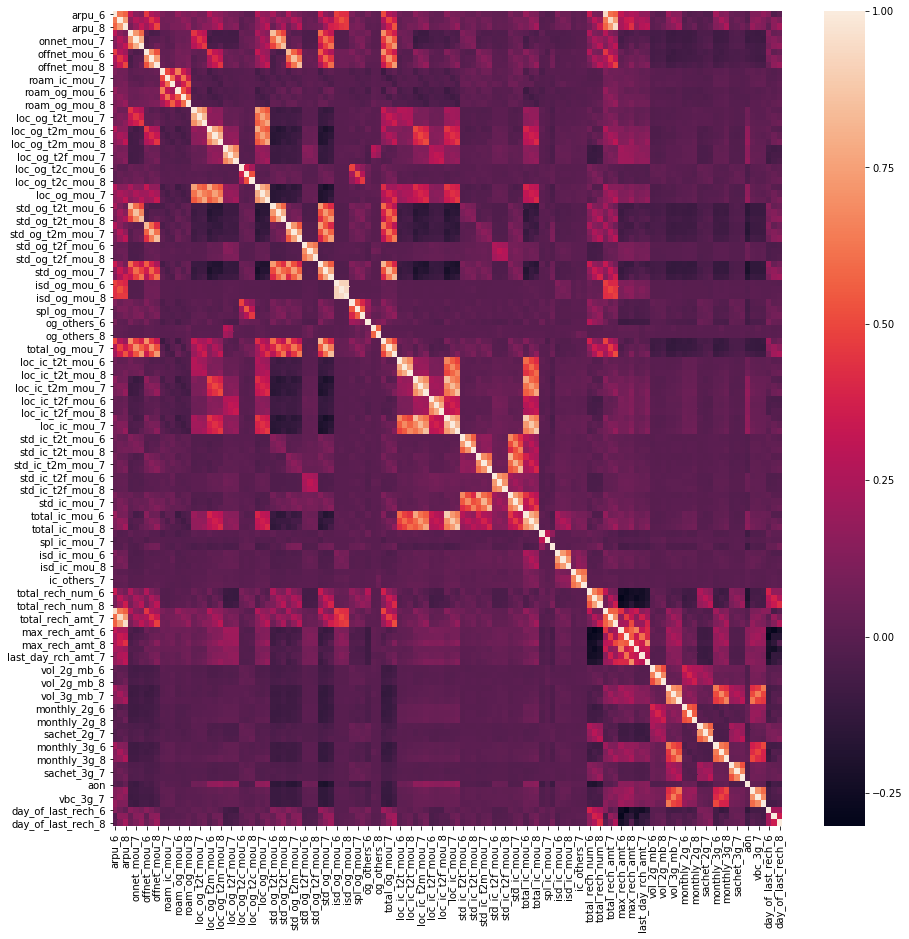

In [30]:
churn_data_hv_bivar = churn_data_hv.drop(['mobile_number', 'Churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (15,15))        # Size of the figure
sns.heatmap(churn_data_hv_bivar.corr())

In [31]:
# Let's now Create correlation matrix
correlation_matrix = churn_data_hv_bivar.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("So the features which are highly CORRELATED IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

So the features which are highly CORRELATED IN DATA SET:28

['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


1. 28 features are highly correlated i.e.(> 80%) found in the data set.

2. We shall use feature reduction methods to drop these variables. We worked with RFE, LASSO and PCA.

### Model Building

#### Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Putting feature variable to X
X = churn_data_hv.drop(['Churn','mobile_number'], axis=1)

# Putting response variable to y
y = churn_data_hv['Churn']



In [34]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Normalization

In [35]:
# normalize all numeric columns except Churn
num_col=[col for col in X_train.columns if X_train[col].dtypes!=np.object ]
print(num_col)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
88105,-1.276418,0.129817,0.873099,-0.644685,-0.524232,-0.463189,-0.899065,1.854384,4.052339,-0.222957,-0.174142,-0.171427,-0.251073,-0.227011,-0.199868,-0.391983,-0.229629,-0.209848,-0.720761,-0.683378,-0.558072,-0.327379,-0.323768,-0.317490,-0.2253,0.335205,-0.197315,-0.734985,-0.607708,-0.506793,-0.466725,-0.436171,-0.385231,-0.499441,2.505862,5.003082,-0.164378,-0.151753,-0.153731,-0.657504,1.418471,3.155763,-0.046486,-0.045439,-0.042376,-0.316745,-0.098091,-0.044404,-0.293839,-0.021005,-0.029833,-1.045576,0.971184,2.551121,-0.423213,-0.393355,-0.337694,-0.712677,-0.596365,-0.467084,-0.331926,-0.154084,-0.078415,-0.770557,-0.647569,-0.510435,-0.212612,-0.175101,-0.206510,-0.322932,-0.166080,-0.060576,-0.146923,-0.151415,-0.133586,-0.373772,-0.237519,-0.168180,-0.847021,-0.684979,-0.535222,-0.434300,-0.097881,-0.250342,-0.165254,-0.154641,-0.153019,-0.078643,-0.088468,-0.090996,-1.258964,1.969704,1.340049,-1.234885,0.150000,0.918602,-0.964864,-0.360947,-0.188910,-0.731709,-0.676372,0.225256,-0.284400,-0.278722,-0.254228,-0.287446,-0.315166,-0.311602,-0.334185,-0.340268,-0.321261,-0.297077,-0.315127,-0.33297,-0.297972,-0.294963,-0.296347,-0.162578,-0.154744,-0.148376,-0.187101,-0.339554,-0.331302,-0.314297,-5.903716,0.770830,0.417548
34588,-0.532197,-0.155187,-0.733325,-0.544468,-0.555446,-0.540589,-0.695401,-0.675693,-0.589845,-0.222957,-0.174142,-0.171427,-0.251073,-0.227011,-0.199868,-0.262693,-0.242137,-0.303787,-0.362360,-0.371680,-0.326223,-0.100001,-0.066886,-0.201154,-0.2253,-0.198004,-0.230825,-0.407651,-0.402649,-0.415483,-0.430701,-0.464031,-0.417875,-0.499441,-0.491987,-0.432464,-0.164378,-0.151753,-0.153731,-0.633060,-0.652748,-0.574058,-0.046486,-0.045439,-0.042376,-0.316745,-0.315500,-0.328842,-0.293839,-0.021005,-0.029833,-0.831405,-0.843030,-0.752490,-0.303788,-0.314020,-0.384248,-0.405582,-0.537806,-0.446609,-0.022107,-0.031230,-0.312220,-0.446014,-0.545395,-0.554361,-0.124701,-0.184658,-0.139260,-0.306446,-0.312001,-0.276762,-0.146923,-0.151415,-0.133586,-0.313457,-0.346875,-0.297837,-0.541461,-0.638353,-0.624487,-0.434300,-0.097881,-0.250342,-0.165254,-0.136730,-0.153019,-0.078643,-0.088468,-0.090996,-0.325638

In [38]:
X_test[num_col] = scaler.transform(X_test[num_col])

X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
76438,0.663187,0.434703,0.933649,1.887475,2.029470,1.524082,0.697624,0.780165,0.929628,-0.222957,-0.174142,-0.171427,-0.251073,-0.227011,-0.199868,4.392888,4.696422,3.672772,2.067334,2.356437,2.634146,-0.327379,-0.323768,-0.054748,-0.2253,-0.198004,-0.230825,4.115349,4.622838,4.060464,-0.466725,-0.469218,-0.423945,-0.394305,-0.388187,-0.358124,-0.164378,-0.151753,0.124111,-0.586460,-0.585178,-0.522201,-0.046486,-0.045439,-0.042376,-0.273611,0.053677,-0.157500,0.762780,-0.021005,-0.029833,1.866622,2.018466,1.718280,3.689983,1.803585,3.446704,0.648195,1.722834,1.367377,-0.274999,-0.047954,0.997862,2.311393,2.163311,2.912638,-0.212612,-0.196863,-0.206510,0.169947,0.165893,0.155429,-0.146923,-0.151415,-0.133586,-0.013551,-0.013642,-0.004883,1.974237,1.799267,2.422628,-0.4343,-0.097881,-0.250342,-0.165254,-0.154641,-0.153019,-0.078643,-0.088468,-0.090996,0.089174,-0.302770,0.077662,0.596056,0.367786,1.087207,-0.347764,-0.360947,-0.188910,0.036097,0.027758,0.225256,-0.2844,-0.278722,-0.254228,-0.287446,-0.315166,-0.311602,-0.334185,-0.340268,-0.321261,-0.297077,-0.315127,-0.33297,-0.297972,-0.294963,-0.296347,-0.162578,-0.154744,-0.148376,-0.715791,-0.339554,-0.331302,-0.314297,0.277343,-0.293288,0.741637
72869,-0.071329,-0.165302,0.019696,-0.227070,-0.344189,-0.249667,-0.163766,0.089986,0.426944,0.356349,-0.174142,-0.171427,0.154434,-0.227011,-0.199868,0.298419,0.169509,0.265310,0.527572,1.129601,1.759823,-0.100001,-0.004289,-0.171577,-0.2253,-0.198004,-0.229485,0.526907,0.833394,1.274631,-0.466725,-0.469218,-0.423945,-0.499441,-0.477340,-0.432966,-0.164378,-0.151753,-0.153731,-0.657504,-0.646216,-0.578429,-0.046486,-0.040712,-0.042376,-0.316745,-0.273273,-0.284671,-0.293839,-0.021005,-0.029833,-0.306134,-0.149916,0.158376,0.448506,0.284354,0.420074,0.457827,0.557560,0.593496,-0.215744,-0.005007,0.487203,0.521961,0.537223,0.698721,-0.191693,-0.196863,-0.206510,-0.306248,-0.265074,-0.237308,-0.146923,-0.151415,-0.133586,-0.350111,-0.320402,-0.301786,0.289513,0.290540,0.433645,-0.4343,-0.097881,-0.250342,-0.165254,-0.153905,-0.153019,-0.046992,-0.088468,-0.065375,-0.429341,-0.302770,-0.343133,-0.116564,0.016242,0.021497,-0.246784,-0.2523

In [39]:
y_train_imbalance = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imbalance = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imbalance))
print("Imbalance in Test Data: {}".format(y_test_imbalance))

Imbalance in Train Data: 0.09234292853052939
Imbalance in Test Data: 0.09964543342706933


#### Balance dataset by oversampling

In [40]:
# (Training) Balance Data-Set --- SMOT
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
bal_X_train,bal_y_train = sm.fit_sample(X_train,y_train)

In [41]:
bal_y_train_imbalance = (bal_y_train != 0).sum()/(bal_y_train == 0).sum()

print("Imbalance in Train Data: {}".format(bal_y_train_imbalance))


Imbalance in Train Data: 1.0


Now we can see data is balanced

### PCA on the data

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca_bal=PCA(svd_solver='randomized', random_state=42)

In [44]:
# PCA on balanced train data
pca_bal.fit(bal_X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [45]:
pca_bal.components_

array([[ 1.13892025e-01,  1.69210449e-01,  1.85351246e-01, ...,
         2.82072688e-02,  1.08307012e-01,  9.95988789e-02],
       [ 7.16036861e-02,  6.60344144e-02,  2.12919497e-02, ...,
         9.08215293e-02,  6.54013308e-02,  6.28221722e-02],
       [ 1.29602506e-01,  1.30747733e-01,  1.35393159e-01, ...,
        -5.42222917e-02, -1.63479614e-02,  1.58392147e-02],
       ...,
       [-3.70607978e-08,  2.02075005e-07, -2.18063982e-07, ...,
        -4.00627394e-08,  1.88174748e-07, -1.14696293e-07],
       [-2.93109923e-07,  3.00153378e-07, -1.72956124e-07, ...,
         1.07494970e-07, -7.50268838e-08,  6.92725537e-08],
       [ 1.98629660e-07,  9.73550040e-08,  3.89824365e-07, ...,
         1.14765723e-08,  7.19372717e-08,  1.29903294e-08]])

In [46]:
pca_bal.explained_variance_ratio_

array([9.49733145e-02, 8.79471284e-02, 6.22447260e-02, 4.55017270e-02,
       4.28419638e-02, 4.20593068e-02, 4.08322745e-02, 3.22748520e-02,
       2.53479424e-02, 2.22223441e-02, 2.08645558e-02, 1.94545031e-02,
       1.85128481e-02, 1.72455491e-02, 1.68300457e-02, 1.64524236e-02,
       1.53399859e-02, 1.51400257e-02, 1.45505884e-02, 1.42152126e-02,
       1.29656116e-02, 1.17757837e-02, 1.15600377e-02, 1.10493995e-02,
       1.04102192e-02, 1.01410514e-02, 9.29828565e-03, 8.84378924e-03,
       8.69896752e-03, 8.50967150e-03, 8.18574093e-03, 8.03933187e-03,
       7.74818812e-03, 7.60206977e-03, 7.42260830e-03, 7.34204582e-03,
       7.10543413e-03, 6.60790748e-03, 6.36154762e-03, 6.25283181e-03,
       5.84139644e-03, 5.52142100e-03, 5.44095604e-03, 5.29459637e-03,
       5.26888845e-03, 5.13488338e-03, 4.93411181e-03, 4.71609238e-03,
       4.68670972e-03, 4.48702566e-03, 4.32775862e-03, 4.10588147e-03,
       4.01454038e-03, 3.86988114e-03, 3.65961832e-03, 3.59086032e-03,
      

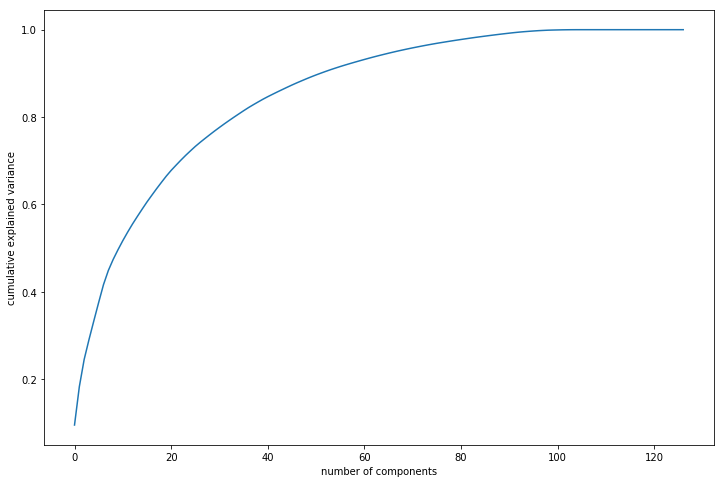

In [47]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_bal.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 70 components are enough to describe 95% of the variance in the dataset
We'll choose 70 components for our modeling

In [48]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=70)

In [49]:
df_train_pca_bal = pca_final.fit_transform(bal_X_train)
df_train_pca_bal.shape

(38422, 70)

In [50]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca_bal.transpose())

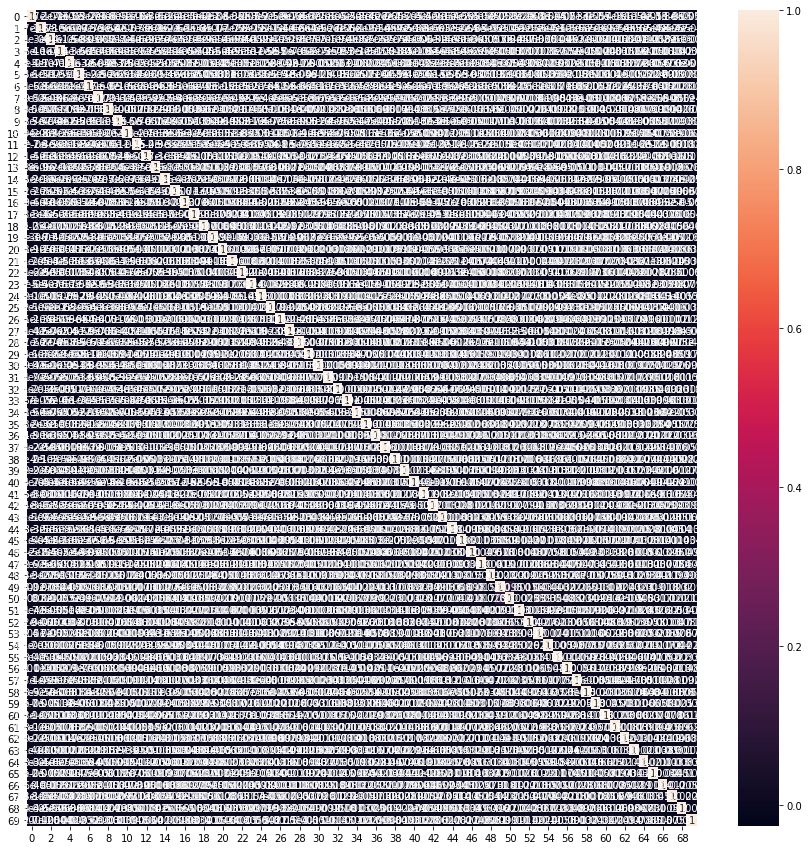

In [51]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (15,15))
sns.heatmap(corrmat,annot = True)

In [52]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0950881650284142 , min corr:  -0.02648737369563787


Indeed - there is no correlation between any two components! Good job, PCA!
We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [53]:
#Applying selected components to the train data - 70 components
df_train_pca=pca_final.transform(X_train)
df_train_pca.shape

(20985, 70)

In [54]:
#Applying selected components to the test data - 70 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 70)

### Logistic regression Model on our Principal Components
We expect to get similar model performance with significantly lower features
If we can do so, we would have done effective dimensionality reduction without losing any import information

In [55]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca_bal,bal_y_train)

In [56]:
#Making prediction on the train data
pred_probs_train = model_pca.predict_proba(df_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train))

'0.9'

In [57]:
pred_probs_train_df=pd.DataFrame(pred_probs_train)

In [58]:
pred_probs_train_df.head()

,0
0,0.082284
1,0.445533
2,0.005396
3,0.197182
4,0.400204


In [59]:
# Converting y_train to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Churn
88105,0
34588,0
16623,0
54904,0
33555,0


In [60]:
# Putting CustID to index
y_train_df['CustID'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
pred_probs_train_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending bal_y_train_df and pred_probs_train_df
y_pred_final = pd.concat([y_train_df,pred_probs_train_df],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,88105,0,0.082284
1,34588,0,0.445533
2,16623,0,0.005396
3,54904,0,0.197182
4,33555,0,0.400204


#### Plotting the ROC Curve

In [61]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )

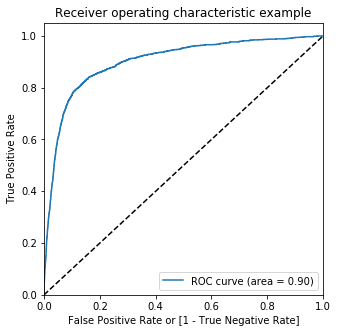

In [62]:
draw_roc( y_pred_final.Churn, y_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [63]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,88105,0,0.082284,1,0,0,0,0,0,0,0,0,0
1,34588,0,0.445533,1,1,1,1,1,0,0,0,0,0
2,16623,0,0.005396,1,0,0,0,0,0,0,0,0,0
3,54904,0,0.197182,1,1,0,0,0,0,0,0,0,0
4,33555,0,0.400204,1,1,1,1,1,0,0,0,0,0


In [64]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.084537  1.000000  0.000000
0.1   0.1  0.490589  0.962232  0.447036
0.2   0.2  0.626495  0.934047  0.598095
0.3   0.3  0.719609  0.906990  0.702306
0.4   0.4  0.787848  0.868095  0.780438
0.5   0.5  0.840362  0.838782  0.840508
0.6   0.6  0.878437  0.791432  0.886471
0.7   0.7  0.903931  0.729425  0.920046
0.8   0.8  0.920181  0.609921  0.948831
0.9   0.9  0.924994  0.367531  0.976472


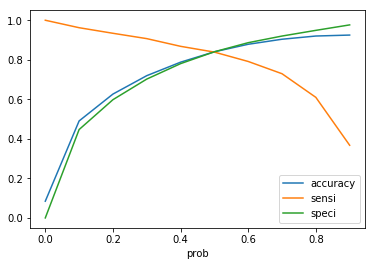

In [65]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.5 is the optimum point to take it as a cutoff probability and sensitivity of the model at this cutoff is 83.4%. If we choose cutoff probability below 0.5, model will have higher sensitivity but at the cost of decreasing overall accuracy and specificity.

#### Model Evaluation

In [66]:
from sklearn import metrics

In [67]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [68]:
pred_probs_test_df=pd.DataFrame(pred_probs_test)
pred_probs_test_df.head()

,0
0,0.000232
1,0.047710
2,0.089552
3,0.538702
4,0.909803


In [69]:
y_test_df=pd.DataFrame(y_test)
y_test_df.head()

,Churn
76438,0
72869,0
86053,0
29093,0
96385,0


In [70]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
pred_probs_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and pred_probs_test_df
y_pred_final_test = pd.concat([y_test_df,pred_probs_test_df],axis=1)
# Renaming the column 
y_pred_final_test= y_pred_final_test.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final_test = y_pred_final_test.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final_test.head()

,CustID,Churn,Churn_Prob
0,76438,0,0.000232
1,72869,0,0.047710
2,86053,0,0.089552
3,29093,0,0.538702
4,96385,0,0.909803


In [71]:
y_pred_final_test['predicted']= y_pred_final_test.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final_test.head()

,CustID,Churn,Churn_Prob,predicted
0,76438,0,0.000232,0
1,72869,0,0.047710,0
2,86053,0,0.089552,0
3,29093,0,0.538702,1
4,96385,0,0.909803,1


In [72]:
# confusion matrix
confusion=metrics.confusion_matrix(y_pred_final_test.Churn,y_pred_final_test.predicted)
print(confusion)

[[6826 1353]
 [ 158  657]]


In [73]:
# Let's check overall accuracy
metrics.accuracy_score(y_pred_final_test.Churn,y_pred_final_test.predicted)

0.8319991105181231

In [74]:
# Predicted     not_churn    churn
# Actual
# not_churn     6839         1340
# churn          161         654

#### Metrics beyond simply accuracy

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Evaluating sensitivity to identify true churn prediction rate
In this case study it is more important to identify churners than the non-churners accurately-so sensitivity/recall is appropriate evaluation metrics which reflect our business goal

In [76]:
TP / float(TP+FN)

0.8061349693251534

Model sensitivity for test data is almost same as for train data = 80 %

### Random Forest Model on principal components

In [77]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [78]:
# fit
rfc.fit(df_train_pca_bal,bal_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [80]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [81]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8179
           1       0.46      0.47      0.47       815

   micro avg       0.90      0.90      0.90      8994
   macro avg       0.70      0.71      0.71      8994
weighted avg       0.90      0.90      0.90      8994



In [82]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7733  446]
 [ 432  383]]


In [83]:
print(accuracy_score(y_test,predictions))

0.902379364020458


In [84]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# check sensitivity/recall
TP / float(TP+FN)

0.8061349693251534

Accuracy in Random forest is higher than Logistic regression but sensitivity is almost same.Lets try to tune hyperparameter to see if sensitivity further increases

#### Hyperparameter Tuning for maximum recall or sensitivity

In [86]:
# GridSearchCV to find optimal parameters
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(50, 100, 200),
    'min_samples_split': range(100,200, 300),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='recall' ,
                          cv = 3, n_jobs = -1,verbose = 1)

In [87]:
# Fit the grid search to the data
grid_search.fit(df_train_pca_bal, bal_y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 14.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(50, 100, 200), 'min_samples_split': range(100, 200, 300), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [88]:
# printing the optimal sensitivity score and hyperparameters
print('We can get max recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get max recall of 0.8570090052574046 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


Fitting the final model with the best parameters obtained from grid search.

In [89]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=100)

In [90]:
# fit
rfc.fit(df_train_pca_bal,bal_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
# predict
predictions = rfc.predict(df_test_pca)

In [92]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8179
           1       0.40      0.74      0.52       815

   micro avg       0.88      0.88      0.88      8994
   macro avg       0.69      0.82      0.72      8994
weighted avg       0.92      0.88      0.89      8994



#### Model Evaluation

In [94]:
print(confusion_matrix(y_test,predictions))

[[7266  913]
 [ 208  607]]


In [95]:
print(accuracy_score(y_test,predictions))

0.8753613520124528


In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
# check sensitivity/recall
TP / float(TP+FN)

0.8061349693251534

Sensitivity/recall value is still 80 % which we have obtained from logistic regression also. So we can go for logistic regression as it is computaionally less expansive. 

### Model without PCA
to identify the important features for churn

#### Logistic Regression using RFE

In [154]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_train, y_train)

In [155]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 8),
 ('arpu_7', True, 1),
 ('arpu_8', False, 10),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 17),
 ('onnet_mou_8', False, 73),
 ('offnet_mou_6', False, 107),
 ('offnet_mou_7', False, 16),
 ('offnet_mou_8', False, 23),
 ('roam_ic_mou_6', False, 31),
 ('roam_ic_mou_7', False, 50),
 ('roam_ic_mou_8', False, 51),
 ('roam_og_mou_6', False, 95),
 ('roam_og_mou_7', False, 11),
 ('roam_og_mou_8', False, 24),
 ('loc_og_t2t_mou_6', False, 47),
 ('loc_og_t2t_mou_7', False, 96),
 ('loc_og_t2t_mou_8', False, 3),
 ('loc_og_t2m_mou_6', False, 61),
 ('loc_og_t2m_mou_7', False, 33),
 ('loc_og_t2m_mou_8', False, 57),
 ('loc_og_t2f_mou_6', False, 19),
 ('loc_og_t2f_mou_7', False, 83),
 ('loc_og_t2f_mou_8', False, 101),
 ('loc_og_t2c_mou_6', False, 87),
 ('loc_og_t2c_mou_7', False, 88),
 ('loc_og_t2c_mou_8', False, 34),
 ('loc_og_mou_6', False, 93),
 ('loc_og_mou_7', False, 74),
 ('loc_og_mou_8', False, 55),
 ('std_og_t2t_mou_6', False, 71),
 ('std_og_t2t_mou_7', False, 90),
 ('

In [156]:
#list of Features identified by RFE for model buidling
col = X_train.columns[rfe.support_]
print(list(col))

['arpu_7', 'onnet_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_6', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'day_of_last_rech_8']


#### Assessing the model with StatsModels

In [157]:
import statsmodels.api as sm

In [158]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20964
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3920.7
Date:                Mon, 04 Nov 2019   Deviance:                       7841.5
Time:                        12:43:47   Pearson chi2:                 5.05e+05
No. Iterations:                    11   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2092      0.083    -50.617      0.000      -4.372      -4.046
arpu_7                 0.3323      0.046      7.289      0.000       0.243       0.422
onnet_mou_6            0.4959      0.076      6.521      0.000       0.347       0.645
std_og_t2m_mou_6       0.4664      0.069      6.743      0.000       0.331       0.602
isd_og_mou_7           0.3492      0.152      2.301      0.021       0.052       0.647
isd_og_mou_8          -0.5981      0.163     -3.669      0.000      -0.918      -0.279
og_others_8           -1.3210      1.317     -1.003      0.316      -3.902       1.260
total_og_mou_6        -0.4321      0.104     -4.136      0.000      -0.637      -0.227
total_og_mou_8        -0.9720      0.063    -15.362      0.000      -1.096      -0.848
loc_ic_mou_8          -1.2244      0.268     -4.566      0.000      -1.750      -0.699
std_ic_t2m_mou_8       0.0273      0.131      0.209      0.834      -0.229       0.284
total_ic_mou_6         0.2634      0.055      4.749      0.000       0.155       0.372
total_ic_mou_7         0.4529      0.071      6.360      0.000       0.313       0.593
total_ic_mou_8        -1.4129      0.287     -4.926      0.000      -1.975      -0.851
spl_ic_mou_8          -0.6150      0.093     -6.622      0.000      -0.797      -0.433
last_day_rch_amt_8    -0.4663      0.061     -7.675      0.000      -0.585      -0.347
monthly_2g_8          -0.5326      0.067     -7.981      0.000      -0.663      -0.402
sachet_2g_8           -0.3533      0.060     -5.899      0.000      -0.471      -0.236
monthly_3g_8          -0.5750      0.074     -7.798      0.000      -0.720      -0.430
aon                   -0.3032      0.039     -7.865      0.000      -0.379      -0.228
day_of_last_rech_8    -0.3904      0.023    -16.906      0.000      -0.436      -0.345
======================================================================================
"""

#### Checking VIFs

In [159]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [160]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,isd_og_mou_7,13.83
4,isd_og_mou_8,12.71
12,total_ic_mou_8,12.44
8,loc_ic_mou_8,8.99
6,total_og_mou_6,7.84
1,onnet_mou_6,4.52
11,total_ic_mou_7,4.12
2,std_og_t2m_mou_6,3.81
10,total_ic_mou_6,3.01
9,std_ic_t2m_mou_8,2.33


In [161]:
# std_ic_t2m_mou_8 has high p but low VIF value lets drop it.
col = col.drop('std_ic_t2m_mou_8', 1)
col

Index(['arpu_7', 'onnet_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'og_others_8', 'total_og_mou_6', 'total_og_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aon', 'day_of_last_rech_8'],
      dtype='object')

In [162]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20965
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3920.8
Date:                Mon, 04 Nov 2019   Deviance:                       7841.5
Time:                        12:43:57   Pearson chi2:                 5.06e+05
No. Iterations:                    11   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2091      0.083    -50.616      0.000      -4.372      -4.046
arpu_7                 0.3322      0.046      7.286      0.000       0.243       0.422
onnet_mou_6            0.4959      0.076      6.520      0.000       0.347       0.645
std_og_t2m_mou_6       0.4671      0.069      6.759      0.000       0.332       0.602
isd_og_mou_7           0.3484      0.151      2.304      0.021       0.052       0.645
isd_og_mou_8          -0.5982      0.163     -3.681      0.000      -0.917      -0.280
og_others_8           -1.3225      1.317     -1.004      0.315      -3.904       1.259
total_og_mou_6        -0.4326      0.104     -4.141      0.000      -0.637      -0.228
total_og_mou_8        -0.9715      0.063    -15.366      0.000      -1.095      -0.848
loc_ic_mou_8          -1.2616      0.198     -6.360      0.000      -1.650      -0.873
total_ic_mou_6         0.2636      0.055      4.754      0.000       0.155       0.372
total_ic_mou_7         0.4533      0.071      6.374      0.000       0.314       0.593
total_ic_mou_8        -1.3693      0.193     -7.083      0.000      -1.748      -0.990
spl_ic_mou_8          -0.6148      0.093     -6.621      0.000      -0.797      -0.433
last_day_rch_amt_8    -0.4663      0.061     -7.674      0.000      -0.585      -0.347
monthly_2g_8          -0.5326      0.067     -7.980      0.000      -0.663      -0.402
sachet_2g_8           -0.3532      0.060     -5.898      0.000      -0.471      -0.236
monthly_3g_8          -0.5750      0.074     -7.799      0.000      -0.720      -0.431
aon                   -0.3034      0.039     -7.870      0.000      -0.379      -0.228
day_of_last_rech_8    -0.3903      0.023    -16.906      0.000      -0.436      -0.345
======================================================================================
"""

In [163]:
# again check the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,isd_og_mou_7,13.83
4,isd_og_mou_8,12.71
6,total_og_mou_6,7.83
11,total_ic_mou_8,6.47
8,loc_ic_mou_8,4.86
1,onnet_mou_6,4.52
10,total_ic_mou_7,4.11
2,std_og_t2m_mou_6,3.80
9,total_ic_mou_6,3.01
0,arpu_7,2.03


In [164]:
# og_others_8 has low vif and high p value lets drop it
col = col.drop('og_others_8', 1)
col

Index(['arpu_7', 'onnet_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'aon', 'day_of_last_rech_8'],
      dtype='object')

In [165]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20966
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3923.2
Date:                Mon, 04 Nov 2019   Deviance:                       7846.4
Time:                        12:44:00   Pearson chi2:                 5.09e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1741      0.074    -56.433      0.000      -4.319      -4.029
arpu_7                 0.3326      0.046      7.297      0.000       0.243       0.422
onnet_mou_6            0.4975      0.076      6.544      0.000       0.348       0.646
std_og_t2m_mou_6       0.4680      0.069      6.776      0.000       0.333       0.603
isd_og_mou_7           0.3218      0.147      2.191      0.028       0.034       0.610
isd_og_mou_8          -0.5746      0.162     -3.557      0.000      -0.891      -0.258
total_og_mou_6        -0.4344      0.104     -4.161      0.000      -0.639      -0.230
total_og_mou_8        -0.9725      0.063    -15.373      0.000      -1.096      -0.848
loc_ic_mou_8          -1.2429      0.199     -6.248      0.000      -1.633      -0.853
total_ic_mou_6         0.2642      0.055      4.764      0.000       0.156       0.373
total_ic_mou_7         0.4542      0.071      6.382      0.000       0.315       0.594
total_ic_mou_8        -1.3918      0.194     -7.159      0.000      -1.773      -1.011
spl_ic_mou_8          -0.6139      0.093     -6.615      0.000      -0.796      -0.432
last_day_rch_amt_8    -0.4657      0.061     -7.659      0.000      -0.585      -0.347
monthly_2g_8          -0.5322      0.067     -7.975      0.000      -0.663      -0.401
sachet_2g_8           -0.3534      0.060     -5.907      0.000      -0.471      -0.236
monthly_3g_8          -0.5746      0.074     -7.795      0.000      -0.719      -0.430
aon                   -0.3038      0.039     -7.889      0.000      -0.379      -0.228
day_of_last_rech_8    -0.3901      0.023    -16.910      0.000      -0.435      -0.345
======================================================================================
"""

In [166]:
# again check the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,isd_og_mou_7,13.83
4,isd_og_mou_8,12.71
5,total_og_mou_6,7.83
10,total_ic_mou_8,6.47
7,loc_ic_mou_8,4.86
1,onnet_mou_6,4.52
9,total_ic_mou_7,4.11
2,std_og_t2m_mou_6,3.80
8,total_ic_mou_6,3.01
0,arpu_7,2.03


In [167]:
# isd_og_mou_7 has high VIF but low p value lets drop it now
col = col.drop('isd_og_mou_7', 1)
col

Index(['arpu_7', 'onnet_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_8',
       'total_og_mou_6', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'aon', 'day_of_last_rech_8'],
      dtype='object')

In [168]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20967
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3925.5
Date:                Mon, 04 Nov 2019   Deviance:                       7851.1
Time:                        12:44:03   Pearson chi2:                 5.08e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1724      0.074    -56.399      0.000      -4.317      -4.027
arpu_7                 0.3538      0.044      8.020      0.000       0.267       0.440
onnet_mou_6            0.4803      0.075      6.393      0.000       0.333       0.628
std_og_t2m_mou_6       0.4525      0.068      6.630      0.000       0.319       0.586
isd_og_mou_8          -0.2585      0.066     -3.929      0.000      -0.387      -0.130
total_og_mou_6        -0.4141      0.103     -4.011      0.000      -0.617      -0.212
total_og_mou_8        -0.9825      0.063    -15.552      0.000      -1.106      -0.859
loc_ic_mou_8          -1.2636      0.198     -6.369      0.000      -1.653      -0.875
total_ic_mou_6         0.2636      0.055      4.755      0.000       0.155       0.372
total_ic_mou_7         0.4493      0.071      6.308      0.000       0.310       0.589
total_ic_mou_8        -1.3724      0.194     -7.080      0.000      -1.752      -0.993
spl_ic_mou_8          -0.6135      0.093     -6.608      0.000      -0.795      -0.432
last_day_rch_amt_8    -0.4656      0.061     -7.666      0.000      -0.585      -0.347
monthly_2g_8          -0.5339      0.067     -7.999      0.000      -0.665      -0.403
sachet_2g_8           -0.3561      0.060     -5.941      0.000      -0.474      -0.239
monthly_3g_8          -0.5810      0.074     -7.882      0.000      -0.725      -0.437
aon                   -0.3022      0.038     -7.850      0.000      -0.378      -0.227
day_of_last_rech_8    -0.3901      0.023    -16.925      0.000      -0.435      -0.345
======================================================================================
"""

In [169]:
# again check the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_og_mou_6,7.83
9,total_ic_mou_8,6.47
6,loc_ic_mou_8,4.85
1,onnet_mou_6,4.52
8,total_ic_mou_7,4.11
2,std_og_t2m_mou_6,3.80
7,total_ic_mou_6,3.01
0,arpu_7,1.85
5,total_og_mou_8,1.66
3,isd_og_mou_8,1.46


In [170]:
# total_og_mou_6 has high VIF but low p value still lets drop it
col=col.drop('total_og_mou_6',1)

In [171]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20968
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3934.1
Date:                Mon, 04 Nov 2019   Deviance:                       7868.2
Time:                        12:44:09   Pearson chi2:                 6.55e+05
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1691      0.074    -56.235      0.000      -4.314      -4.024
arpu_7                 0.3440      0.044      7.846      0.000       0.258       0.430
onnet_mou_6            0.2017      0.029      7.057      0.000       0.146       0.258
std_og_t2m_mou_6       0.2011      0.026      7.597      0.000       0.149       0.253
isd_og_mou_8          -0.2771      0.065     -4.239      0.000      -0.405      -0.149
total_og_mou_8        -0.9936      0.063    -15.700      0.000      -1.118      -0.870
loc_ic_mou_8          -1.4173      0.194     -7.298      0.000      -1.798      -1.037
total_ic_mou_6         0.1927      0.052      3.741      0.000       0.092       0.294
total_ic_mou_7         0.4496      0.071      6.316      0.000       0.310       0.589
total_ic_mou_8        -1.2585      0.189     -6.660      0.000      -1.629      -0.888
spl_ic_mou_8          -0.6147      0.093     -6.617      0.000      -0.797      -0.433
last_day_rch_amt_8    -0.4595      0.060     -7.633      0.000      -0.578      -0.342
monthly_2g_8          -0.5283      0.067     -7.930      0.000      -0.659      -0.398
sachet_2g_8           -0.3596      0.060     -5.971      0.000      -0.478      -0.242
monthly_3g_8          -0.5712      0.073     -7.784      0.000      -0.715      -0.427
aon                   -0.3045      0.038     -7.922      0.000      -0.380      -0.229
day_of_last_rech_8    -0.3810      0.023    -16.677      0.000      -0.426      -0.336
======================================================================================
"""

In [172]:
# again check the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,6.34
5,loc_ic_mou_8,4.73
7,total_ic_mou_7,4.10
6,total_ic_mou_6,2.76
0,arpu_7,1.83
4,total_og_mou_8,1.62
3,isd_og_mou_8,1.44
1,onnet_mou_6,1.22
2,std_og_t2m_mou_6,1.22
10,last_day_rch_amt_8,1.15


In [173]:
#All the variables have low p value but still few have high vif. total_ic_mou_8 has high vif value lets drop it.
col=col.drop('total_ic_mou_8',1)

In [174]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3972.8
Date:                Mon, 04 Nov 2019   Deviance:                       7945.5
Time:                        12:44:13   Pearson chi2:                 1.20e+06
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1508      0.074    -56.088      0.000      -4.296      -4.006
arpu_7                 0.3971      0.042      9.401      0.000       0.314       0.480
onnet_mou_6            0.2135      0.029      7.426      0.000       0.157       0.270
std_og_t2m_mou_6       0.2056      0.026      7.775      0.000       0.154       0.257
isd_og_mou_8          -0.3594      0.081     -4.429      0.000      -0.518      -0.200
total_og_mou_8        -1.1245      0.063    -17.951      0.000      -1.247      -1.002
loc_ic_mou_8          -2.2463      0.126    -17.839      0.000      -2.493      -2.000
total_ic_mou_6         0.1743      0.049      3.525      0.000       0.077       0.271
total_ic_mou_7         0.1181      0.058      2.034      0.042       0.004       0.232
spl_ic_mou_8          -0.6359      0.094     -6.789      0.000      -0.819      -0.452
last_day_rch_amt_8    -0.4988      0.060     -8.350      0.000      -0.616      -0.382
monthly_2g_8          -0.5270      0.066     -7.984      0.000      -0.656      -0.398
sachet_2g_8           -0.3681      0.060     -6.121      0.000      -0.486      -0.250
monthly_3g_8          -0.6070      0.073     -8.281      0.000      -0.751      -0.463
aon                   -0.3035      0.038     -7.957      0.000      -0.378      -0.229
day_of_last_rech_8    -0.3880      0.023    -17.074      0.000      -0.433      -0.343
======================================================================================
"""

In [175]:
# again check the VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_ic_mou_7,3.43
6,total_ic_mou_6,2.74
5,loc_ic_mou_8,2.47
0,arpu_7,1.82
4,total_og_mou_8,1.59
3,isd_og_mou_8,1.44
1,onnet_mou_6,1.22
2,std_og_t2m_mou_6,1.22
9,last_day_rch_amt_8,1.15
14,day_of_last_rech_8,1.14


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [176]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

88105    0.002839
34588    0.047929
16623    0.002179
54904    0.004641
33555    0.042632
25467    0.043246
44097    0.045041
81316    0.002972
20754    0.051280
4688     0.195650
dtype: float64

In [177]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00283897, 0.04792895, 0.0021794 , 0.00464142, 0.04263225,
       0.04324566, 0.04504104, 0.00297175, 0.05127977, 0.19565026])

#### Creating a dataframe with the actual Lead conversion tag and the predicted probabilities

In [178]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.002839,88105
1,0,0.047929,34588
2,0,0.002179,16623
3,0,0.004641,54904
4,0,0.042632,33555


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [179]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.002839,88105,0
1,0,0.047929,34588,0
2,0,0.002179,16623,0
3,0,0.004641,54904,0
4,0,0.042632,33555,0


In [180]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18948   263]
 [ 1296   478]]


In [181]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9257088396473672


#### Important Predictor variables:

In [182]:
print(list(col))

['arpu_7', 'onnet_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'day_of_last_rech_8']


#### Visualization of important features:

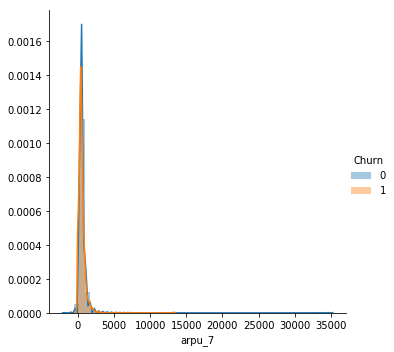

In [135]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"arpu_7").add_legend()

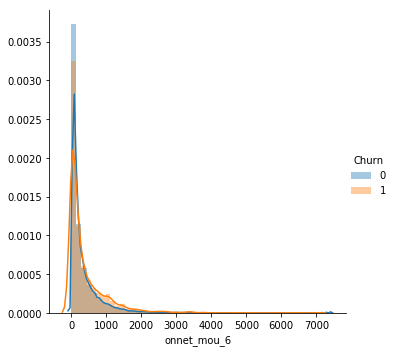

In [136]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"onnet_mou_6").add_legend()

completely overlapping for churn and non churn, no information can be withdrawan from this graph.

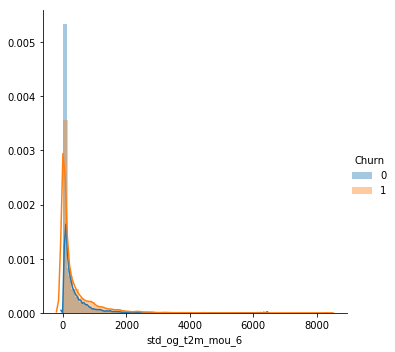

In [137]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"std_og_t2m_mou_6").add_legend()

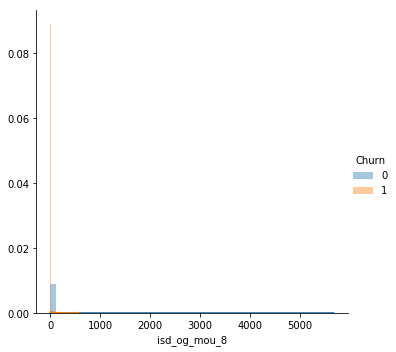

In [138]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"isd_og_mou_8").add_legend()

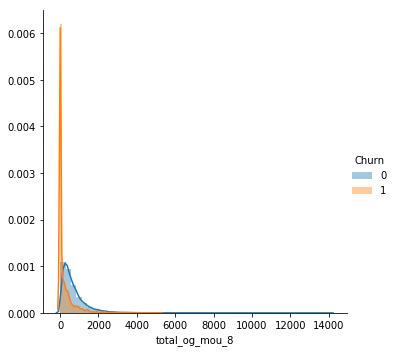

In [139]:

sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"total_og_mou_8").add_legend()

In [140]:
# total outgoing minutes of usage in 8 th month for churn customers are very low, peak is at 0.

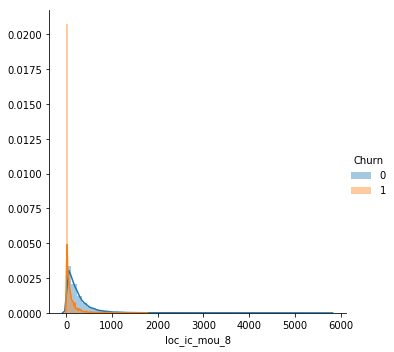

In [141]:

sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"loc_ic_mou_8").add_legend()

In [142]:
# local incoming also almost 0 in 8th month for churn customers.

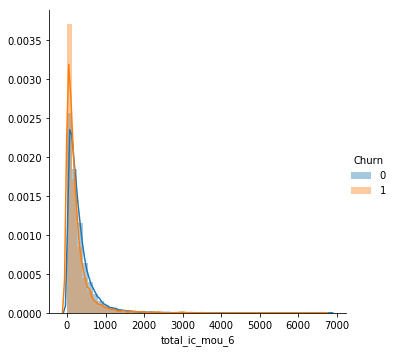

In [143]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"total_ic_mou_6").add_legend()

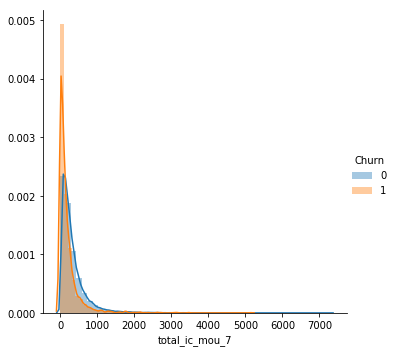

In [144]:

sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"total_ic_mou_7").add_legend()

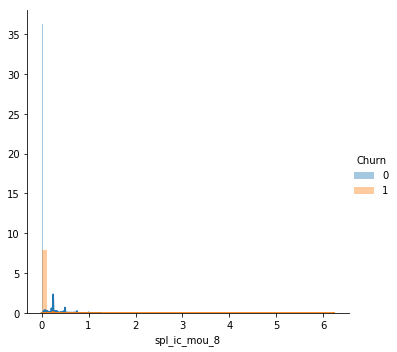

In [145]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"spl_ic_mou_8").add_legend()

All incoming call usage timings also very low for churn customers in 8th month.

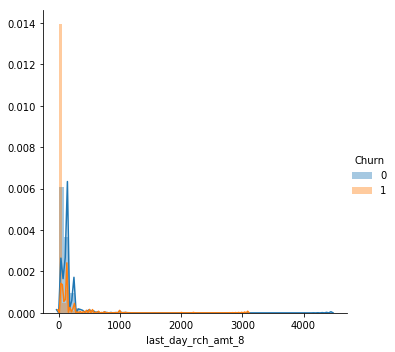

In [146]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,"last_day_rch_amt_8").add_legend()

For churn customers last day recharge amount is very low. We can offer lucrative offers to those customers in 8th month to pursue them for higher recharge amount.

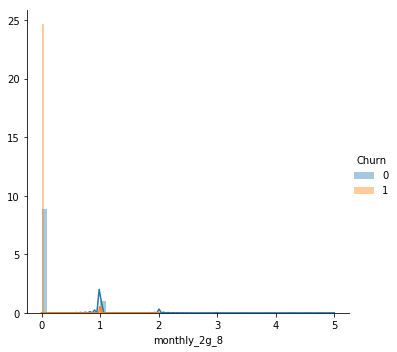

In [147]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,'monthly_2g_8').add_legend()

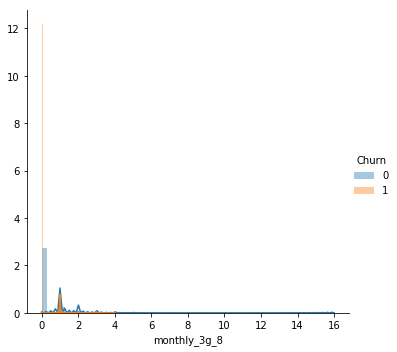

In [148]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,'monthly_3g_8').add_legend()

As the 'monthly_2g_8' or 'monthly_3g_8' increases customers tendency to churn decreases.

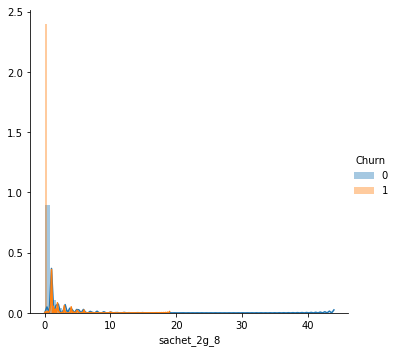

In [149]:

sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,'sachet_2g_8').add_legend()

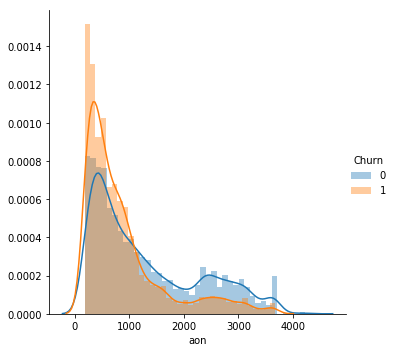

In [150]:

sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,'aon').add_legend()

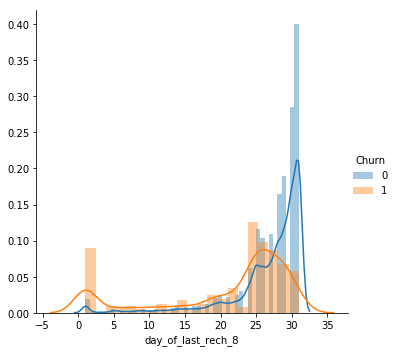

In [151]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(sns.distplot,'day_of_last_rech_8').add_legend()

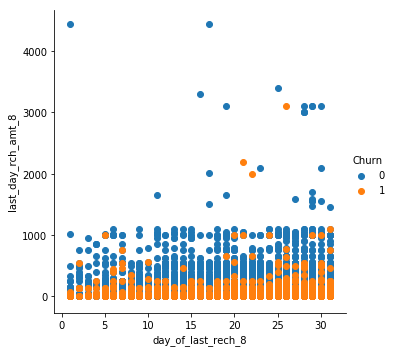

In [152]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(plt.scatter,'day_of_last_rech_8', 'last_day_rch_amt_8').add_legend()

from above plot it is clear that churn customers are although recharging through out the 8th month but their recharge amount is usually low.

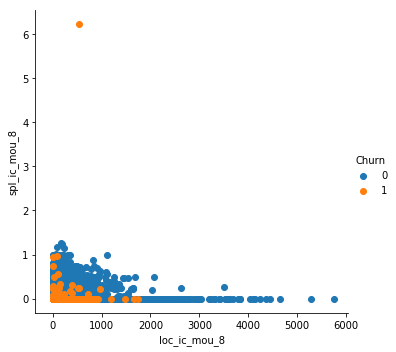

In [153]:
sns.FacetGrid(churn_data_hv,hue='Churn',size=5).map(plt.scatter,'loc_ic_mou_8', 'spl_ic_mou_8').add_legend()

from the above plot we can see that for churn customers local incomming calls are very low but special incoming call are there.

### Recommendations strategies to manage customer churn:

1.Offer more talktime on onnet calls so that minutes of usage on same network increases.

2.Offer more talktime on offnet calls so that minutes of usage to other network increases.

3.Offer lucrative offers on higher recharge amounts so that customers go for higher amount recharge.

4.Provide lucrative offers on 2g and 3g services as people who are not availing any monthly 2g and 3g packs are more prone to churn.

5.customers who stay longer on network are less prone to churn so focus more on customers with higher aon.
